In [12]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [13]:
!unzip archive.zip

Archive:  archive.zip
replace __MACOSX/._archive? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [14]:
def get_data(filename):
  with open(filename) as training_file:
    csv_reader = csv.reader(training_file, delimiter = ',')
    next(csv_reader)
    temp_images = []
    temp_labels = []
    for row in csv_reader:
      temp_labels.append(row[0])
      image_data = row[1:785]
      image_data_as_array = np.array_split(image_data, 28)
      temp_images.append(image_data_as_array)

    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')
  return images, labels

training_images, training_labels = get_data('./archive/sign_mnist_train.csv')
testing_images, testing_labels = get_data('./archive/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)


Epoch 1/15
857/857 [==============================] - 17s 11ms/step - loss: 2.9694 - accuracy: 0.1109 - val_loss: 1.6818 - val_accuracy: 0.4272
Epoch 2/15
857/857 [==============================] - 10s 11ms/step - loss: 2.0445 - accuracy: 0.3568 - val_loss: 1.1265 - val_accuracy: 0.6093
Epoch 3/15
857/857 [==============================] - 10s 11ms/step - loss: 1.5992 - accuracy: 0.4865 - val_loss: 0.8621 - val_accuracy: 0.6928
Epoch 4/15
857/857 [==============================] - 9s 11ms/step - loss: 1.3845 - accuracy: 0.5522 - val_loss: 0.7503 - val_accuracy: 0.7119
Epoch 5/15
857/857 [==============================] - 10s 11ms/step - loss: 1.1823 - accuracy: 0.6158 - val_loss: 0.6480 - val_accuracy: 0.7942
Epoch 6/15
857/857 [==============================] - 9s 11ms/step - loss: 1.0702 - accuracy: 0.6422 - val_loss: 0.5162 - val_accuracy: 0.8334
Epoch 7/15
857/857 [==============================] - 9s 11ms/step - loss: 0.9469 - accuracy: 0.6860 - val_loss: 0.4713 - val_accuracy: 0.

[159.91159057617188, 0.6945064067840576]

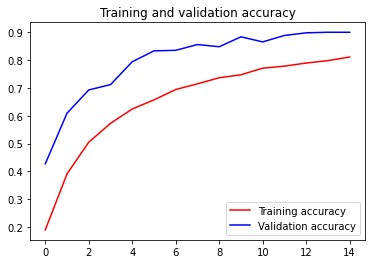

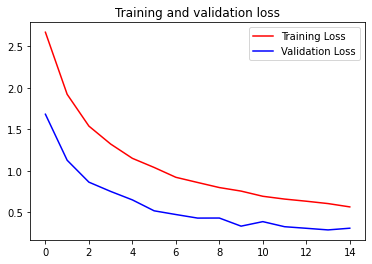

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [7]:
!nvidia-smi

Wed Feb 24 12:27:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    29W /  70W |    754MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
!git clone https://github.com/hao134/ImageModelZoo.git

Cloning into 'ImageModelZoo'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 107 (delta 61), reused 82 (delta 37), pack-reused 0
Receiving objects: 100% (107/107), 5.74 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [23]:
cd ./ImageModelZoo/models

/content/ImageModelZoo/models


In [24]:
ls

DenseNet.md     MobileNetV1.py  model.png  VGG.md          XceptionNet.py
DenseNet.py     MobileNetV2.md  ResNet.md  VGG.py
MobileNetV1.md  MobileNetV2.py  ResNet.py  XceptionNet.md


In [25]:
import VGG

In [31]:
model = VGG.vgg16(input_shape = (28,28,1), n_classes = 26, alpha = 0.5, n_downsampling = 3, last_dense_units = 128)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_201 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_202 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_14 (ReLU)              (None, 28, 28, 32)        0   

In [33]:
# training_images = np.expand_dims(training_images, axis=3)
# testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

from tensorflow.keras.optimizers import RMSprop

# # Flatten the output layer to 1 dimension
# x = layers.Flatten()(last_output)
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# # Add a final sigmoid layer for classification
# x = layers.Dense  (26, activation='softmax')(x)           

# model = Model( pre_trained_model.input, x) 

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)


(27455, 28, 28, 1)
(7172, 28, 28, 1)
Epoch 1/15
857/857 [==============================] - 33s 36ms/step - loss: 3.0993 - accuracy: 0.1171 - val_loss: 2.1386 - val_accuracy: 0.3291
Epoch 2/15
857/857 [==============================] - 30s 35ms/step - loss: 1.5360 - accuracy: 0.5219 - val_loss: 1.0707 - val_accuracy: 0.6744
Epoch 3/15
857/857 [==============================] - 30s 35ms/step - loss: 0.9232 - accuracy: 0.7493 - val_loss: 0.5748 - val_accuracy: 0.8749
Epoch 4/15
857/857 [==============================] - 30s 35ms/step - loss: 0.6963 - accuracy: 0.8367 - val_loss: 0.7537 - val_accuracy: 0.8164
Epoch 5/15
857/857 [==============================] - 30s 35ms/step - loss: 0.5720 - accuracy: 0.8902 - val_loss: 0.5393 - val_accuracy: 0.8967
Epoch 6/15
857/857 [==============================] - 30s 35ms/step - loss: 0.4964 - accuracy: 0.9177 - val_loss: 0.3824 - val_accuracy: 0.9632
Epoch 7/15
857/857 [==============================] - 30s 35ms/step - loss: 0.4700 - accuracy: 0.93

[281.8675842285156, 0.1045733392238617]

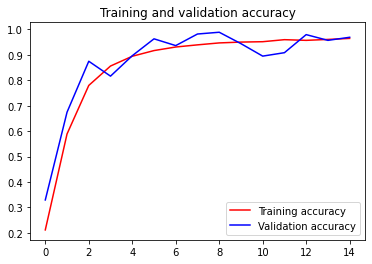

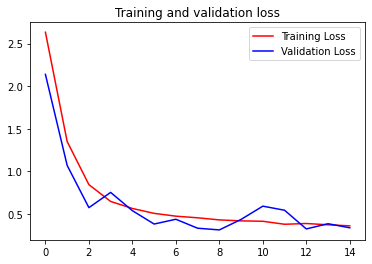

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
ls

DenseNet.md     MobileNetV1.py  model.png     ResNet.py  XceptionNet.md
DenseNet.py     MobileNetV2.md  __pycache__/  VGG.md     XceptionNet.py
MobileNetV1.md  MobileNetV2.py  ResNet.md     VGG.py


In [40]:
import ResNet

In [42]:
model = ResNet.ResNet(input_shape = (28,28,1), n_classes = 26, first_layer_kernel = 3,
        first_layer_downsampling = False, first_pooling = None, 
        bottleneck = False, l2_weight = 1e-4)

In [44]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_216 (Conv2D)             (None, 28, 28, 256)  2560        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_214 (BatchN (None, 28, 28, 256)  1024        conv2d_216[0][0]                 
__________________________________________________________________________________________________
re_lu_26 (ReLU)                 (None, 28, 28, 256)  0           batch_normalization_214[0][0]    
____________________________________________________________________________________________

In [1]:
# training_images = np.expand_dims(training_images, axis=3)
# testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

from tensorflow.keras.optimizers import RMSprop

# # Flatten the output layer to 1 dimension
# x = layers.Flatten()(last_output)
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# # Add a final sigmoid layer for classification
# x = layers.Dense  (26, activation='softmax')(x)           

# model = Model( pre_trained_model.input, x) 

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()